# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
!pip install folium

In [112]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [114]:
!wget  -O 'train.csv' -q 'https://www.dropbox.com/s/en5f9nhn915cnkf/_train.csv?dl=0'
df = pd.read_csv('train.csv')
print("{} rows, {} columns".format(df.shape[0], df.shape[1]))
print(df.dtypes)
df.head(5)

1458644 rows, 11 columns
id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [115]:
df.drop('dropoff_datetime', axis=1, inplace=True)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

In [80]:
print(df['trip_duration'].nsmallest(100).tolist())
print(df['trip_duration'].nlargest(100).tolist())

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3526282, 2227612, 2049578, 1939736, 86392, 86391, 86390, 86387, 86385, 86379, 86378, 86378, 86377, 86377, 86369, 86369, 86369, 86369, 86367, 86367, 86366, 86365, 86364, 86364, 86363, 86362, 86362, 86362, 86362, 86361, 86361, 86361, 86360, 86358, 86358, 86358, 86357, 86357, 86357, 86356, 86356, 86356, 86356, 86355, 86354, 86354, 86354, 86354, 86353, 86353, 86353, 86352, 86352, 86352, 86352, 86352, 86351, 86351, 86351, 86350, 86349, 86349, 86348, 86348, 86347, 86347, 86346, 86346, 86346, 86346, 86346, 86346, 86345, 86345, 86345, 86345, 86344, 86344, 86344, 86344, 86344, 86343, 86343, 86342, 86342, 86342, 86341, 86341, 86341, 86340, 86340, 86340, 86340, 86340, 86340, 86340, 86340, 86339, 8633

<Axes: title={'center': 'Distribution of trip duration'}, xlabel='trip_duration', ylabel='Count'>

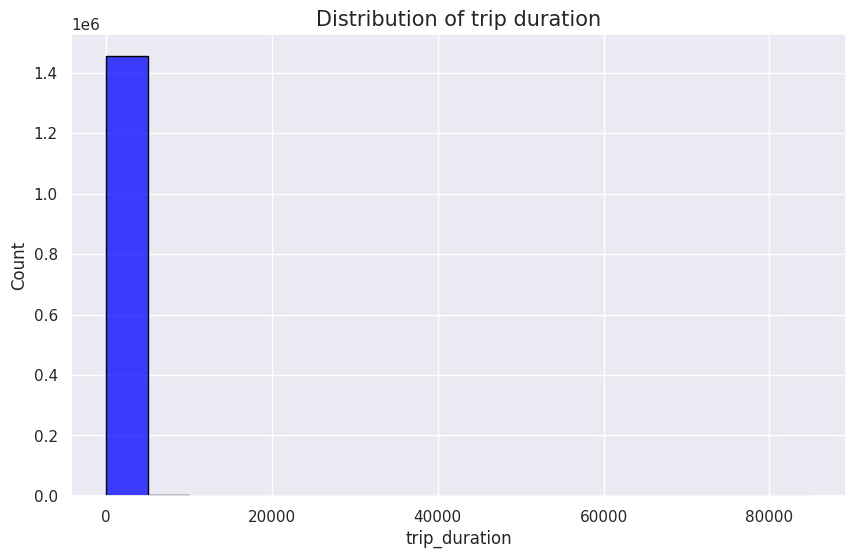

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Distribution of trip duration', fontsize=15)
bins = [i for i in range(0, 87000, 5000)]
sns.histplot(df['trip_duration'], bins=bins, ax=ax, color='blue', edgecolor='black')

Как видим, значений > 10000 примерно эпсилон. Выбросы? Попробуем уменьшить шкалу по оси Х.

<Axes: title={'center': 'Distribution of trip duration'}, xlabel='trip_duration', ylabel='Count'>

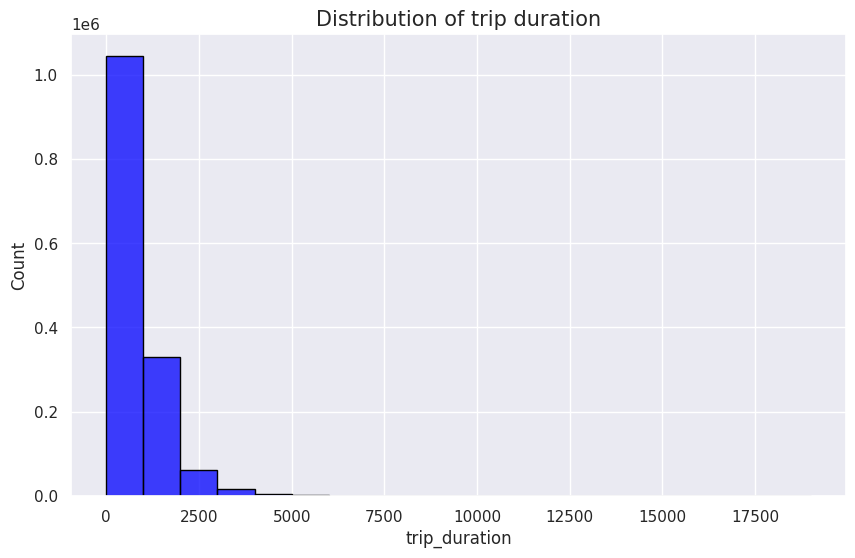

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Distribution of trip duration', fontsize=15)
bins = [i for i in range(0, 20000, 1000)]
sns.histplot(df['trip_duration'], bins=bins, ax=ax, color='blue', edgecolor='black')

Ок, ещё уменьшим.

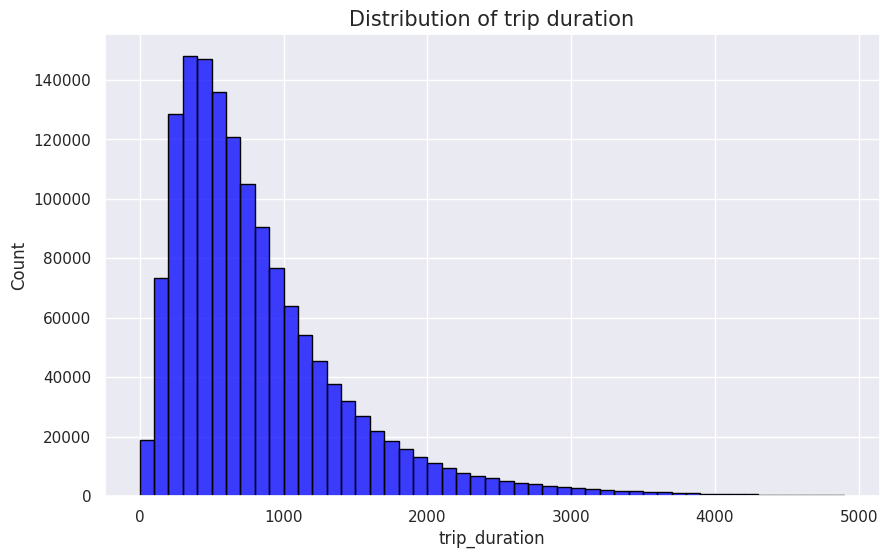

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Distribution of trip duration', fontsize=15)
bins = [i for i in range(0, 5000, 100)]
sns.histplot(df['trip_duration'], bins=bins, ax=ax, color='blue', edgecolor='black')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Распределение целевой переменной похоже на гамма-распределение с параметрами чёто типа $\alpha=4, \beta=125$ (на глаз не судите строго). Большая часть поездок длится в районе 300-600 секунд, и около 90% поездок длятся не более 2000-2200 секунд (нижняя граница не ограничена, поездок, которые длятся менее 100 секунд довольно немало).

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Кажется, что нам важно не точное количество секунд в поездке, а примерный порядок (+- 10 секунд в предсказании особой роли вряд ли сыграют, а вот различать длительность поездки в 10, 100 или 1000 секунд уже более значимо). Кроме того, RMSLE штрафует заниженные прогнозы сильнее, чем завышенные. Зачем нам это может быть нужно? Наверное, потому что, если такси освободится и будет готово принять следующий заказ пораньше (завышенный прогноз времени поездки), то это не очень страшно, а вот если такси не успеет приехать к следующему клиенту (заниженный прогноз времени поездки), то это уже довольно плохо.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: в RMSLE для модели $a$ мы минимизируем функционал

$$\sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell}(\hat{y_i} - \hat{a}(x_i))^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell}(\hat{a}(x_i) - \hat{y_i})^2}$$

В MSE для модели $\hat{a}$ мы минимизируем функционал

$$\frac{1}{\ell}\sum_{i=1}^{\ell}(\hat{a}(x_i) - \hat{y_i})^2$$

Получили одну и ту же сумму, только в первом случае с корнем, а во втором без. Но задача минимизации (неотрицательной) переменной $x$ эквивалентна минимизации $\sqrt{x}$. $\blacksquare$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [116]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])

Я честно сначала дропнула колонку но нам потом её же нужно использовать чтобы среднюю скорость посчитать чзх.............

<Axes: title={'center': 'Distribution of trip duration logarithm'}, xlabel='log_trip_duration', ylabel='Count'>

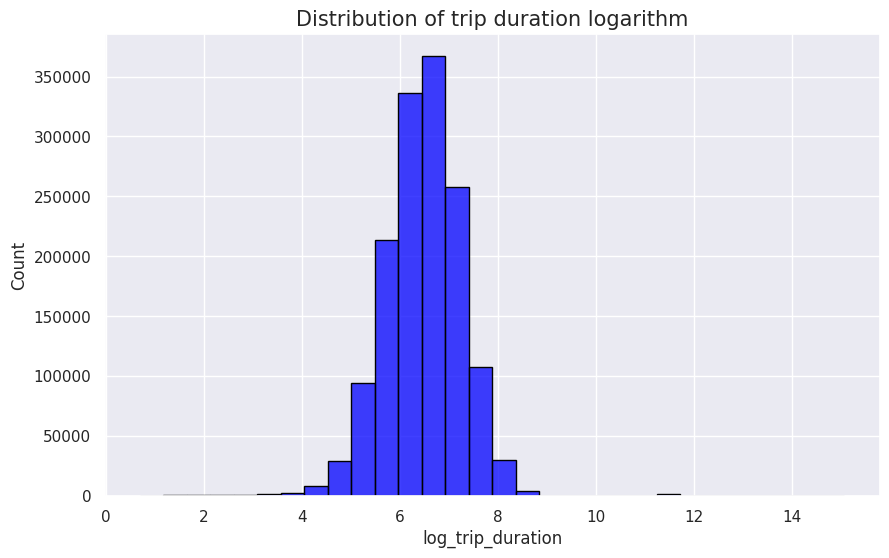

In [82]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Distribution of trip duration logarithm', fontsize=15)
sns.histplot(df['log_trip_duration'], bins=30, ax=ax, color='blue', edgecolor='black')

Не уверена, что за свойство тут имели в виду, но его же не просили написать, так что)))

Полагаю, что это свойство: теперь распределение целевого таргета +- симметрично, в отличие от изначальной картины, где у нас был оооооочень длиный правый хвост.

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [117]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(np.mean(np.square(log1p_y_true - log1p_y_pred)))

rmsle_best_const = rmsle(df['log_trip_duration'], np.mean(df['log_trip_duration']))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

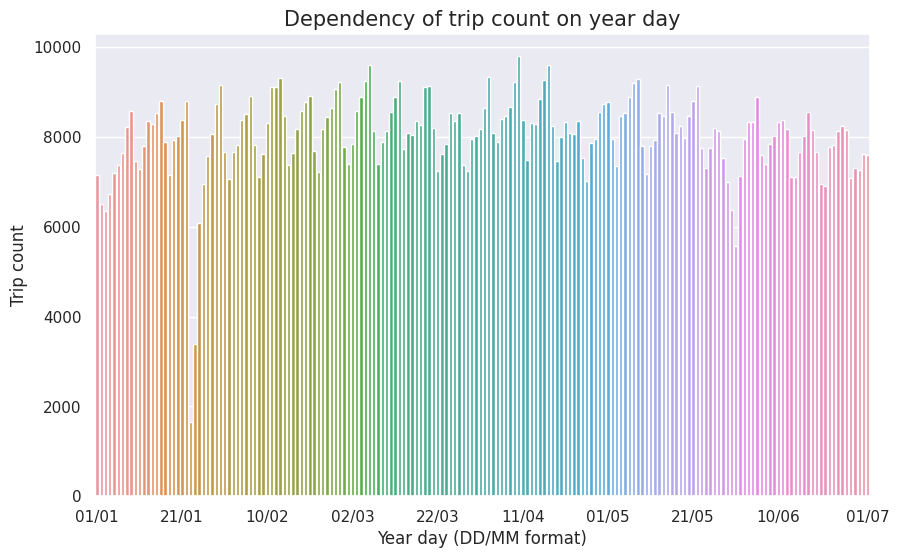

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df['pickup_datetime'].dt.dayofyear)

plt.title('Dependency of trip count on year day', fontsize=15)
plt.xlabel('Year day (DD/MM format)')
plt.ylabel('Trip count')

tick_number = 10
unique_days = sorted(df['pickup_datetime'].dt.dayofyear.unique())
tick_pos = [int(i) for i in np.linspace(0, len(unique_days) - 1, tick_number)]
tick_labels = [pd.to_datetime(unique_days[i], format='%j').strftime('%d/%m') for i in tick_pos]

ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels)

plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [13]:
df.groupby(df['pickup_datetime'].dt.dayofyear).count()['id'].reset_index(name='count').sort_values(['count'], ascending=True).head(5)
#Нашла решение здесь: https://stackoverflow.com/questions/40454030/count-and-sort-with-pandas

,pickup_datetime,count
22,23,1648
23,24,3383
150,151,5570
24,25,6084
2,3,6353


Итак, два аномальных периода — это несколько дней, начиная с 23 дня года (23 января) и 151 день года (30 мая).

22-23 января 2016 года в Нью-Йорке были аномальные снежные бури, каких не наблюдали до этого приблизительно 150 лет. Вероятно, люди не горели желанием выходить из дома в такую погоду, и с этим был связано резкое падение числа поездок. Источник: https://www.nbcnewyork.com/news/local/nyc-new-york-city-blizzard-biggest-ever-january-23-2016/831660/

29 мая 2016 года, во-первых, была новость о стрельбе в Нью-Йорке, в результате которой пострадало 9 человек в разных районах; а во-вторых, довольно сильные ливни из-за тропического циклона. Источники: https://tass.ru/proisshestviya/3324970; https://en.wikipedia.org/wiki/Tropical_Storm_Bonnie_(2016).

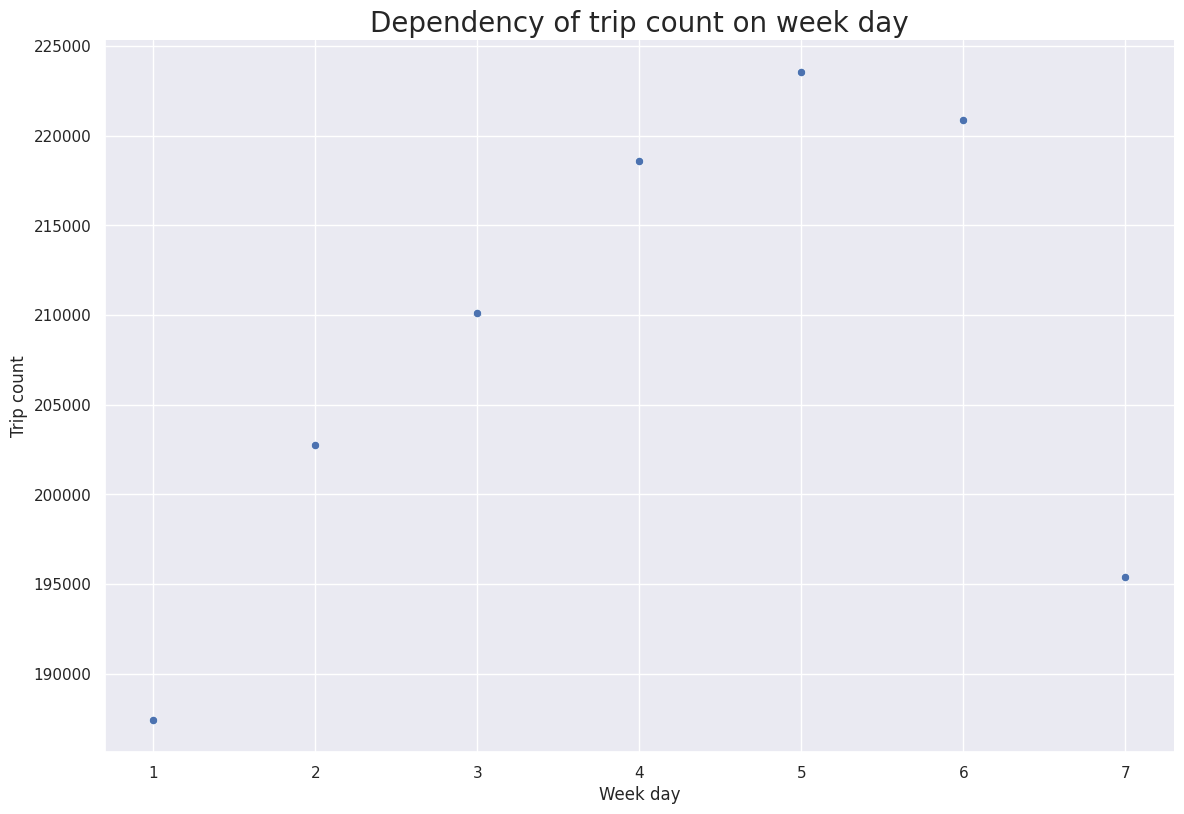

In [118]:
df['week_day'] = df['pickup_datetime'].dt.dayofweek + 1
df['count_by_week_day'] = df.groupby('week_day')['week_day'].transform('count')

sns.relplot(x='week_day', y='count_by_week_day', data=df, height=8, aspect=1.5)

plt.title('Dependency of trip count on week day', fontsize=20)
plt.xlabel('Week day')
plt.ylabel('Trip count')

plt.show()

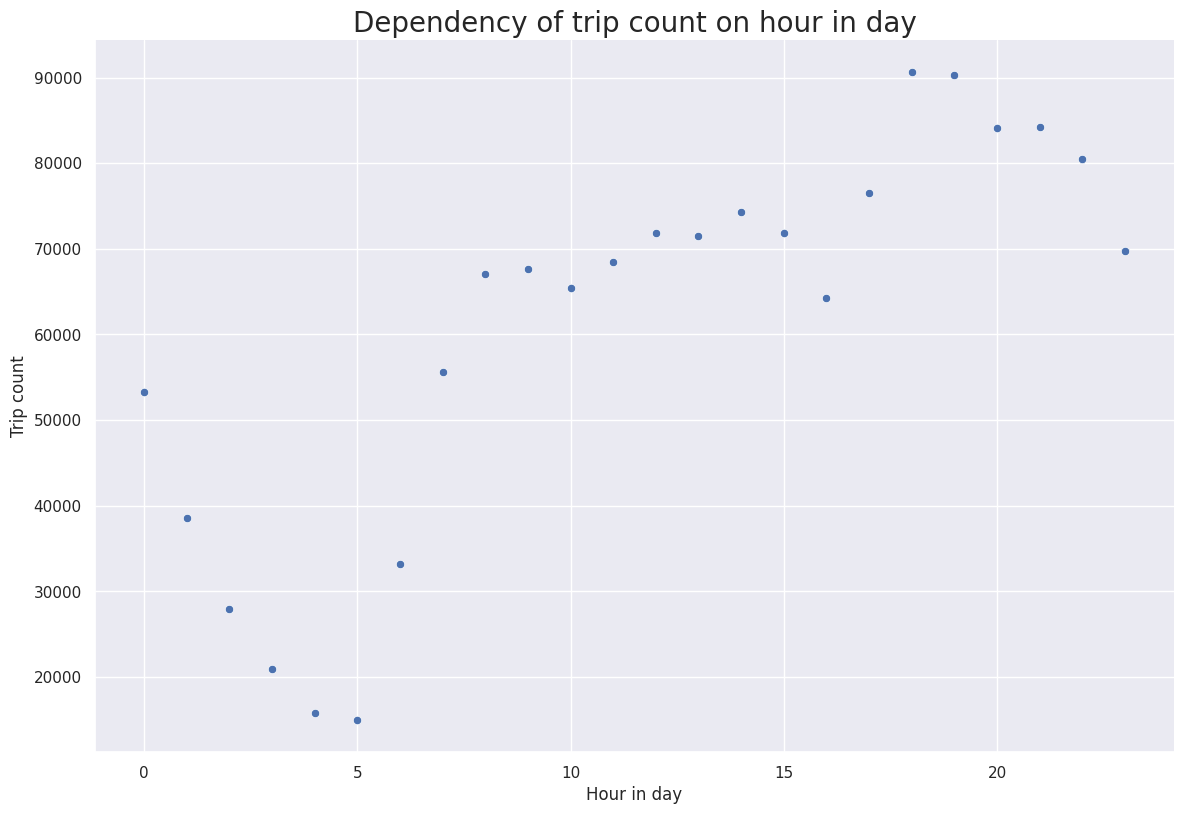

In [119]:
df['hour'] = df['pickup_datetime'].dt.hour
df['count_by_hour'] = df.groupby('hour')['hour'].transform('count')

sns.relplot(x='hour', y='count_by_hour', data=df, height=8, aspect=1.5)

plt.title('Dependency of trip count on hour in day', fontsize=20)
plt.xlabel('Hour in day')
plt.ylabel('Trip count')

plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

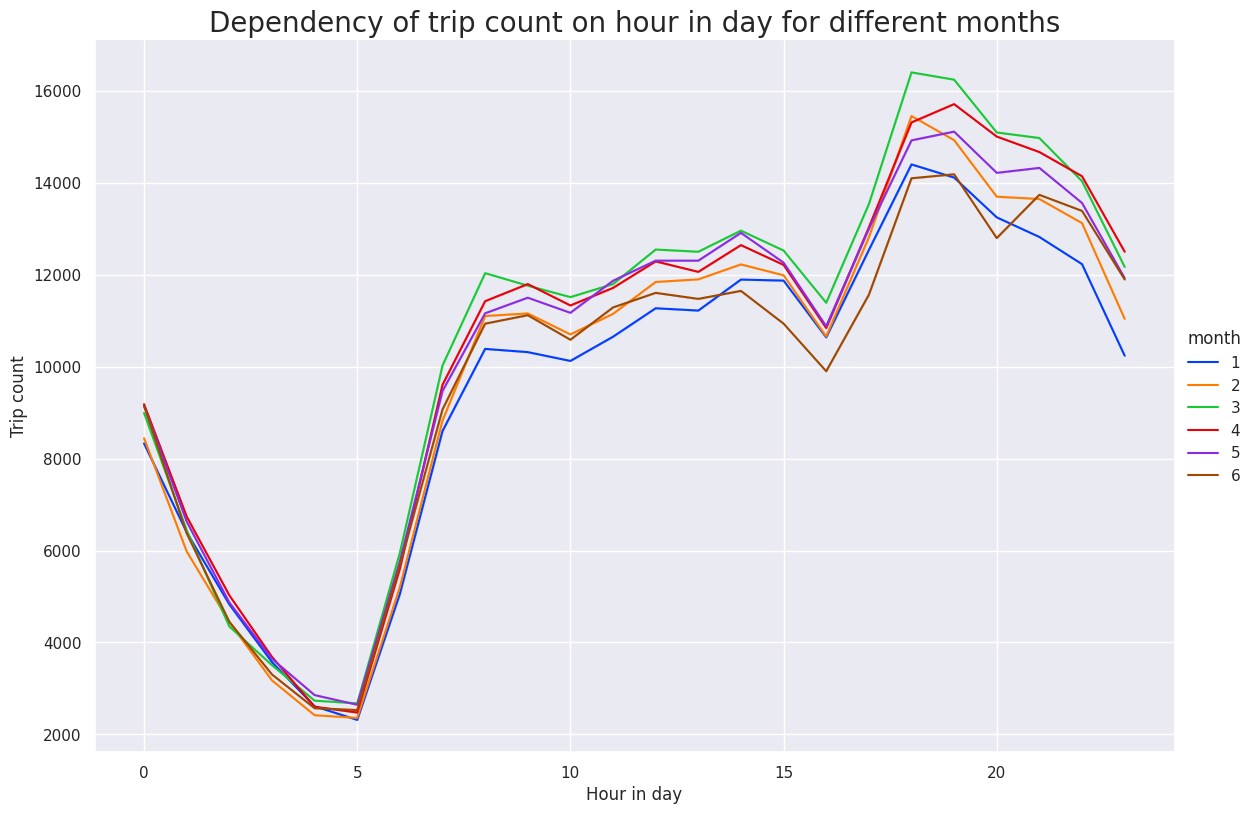

In [120]:
df['month'] = df['pickup_datetime'].dt.month
df['count_by_month_hour'] = df.groupby(['hour', 'month'])['month'].transform('count')

sns.relplot(x='hour', y='count_by_month_hour', hue='month', data=df, kind='line', palette='bright', height=8, aspect=1.5)

plt.title('Dependency of trip count on hour in day for different months', fontsize=20)
plt.xlabel('Hour in day')
plt.ylabel('Trip count')

plt.show()

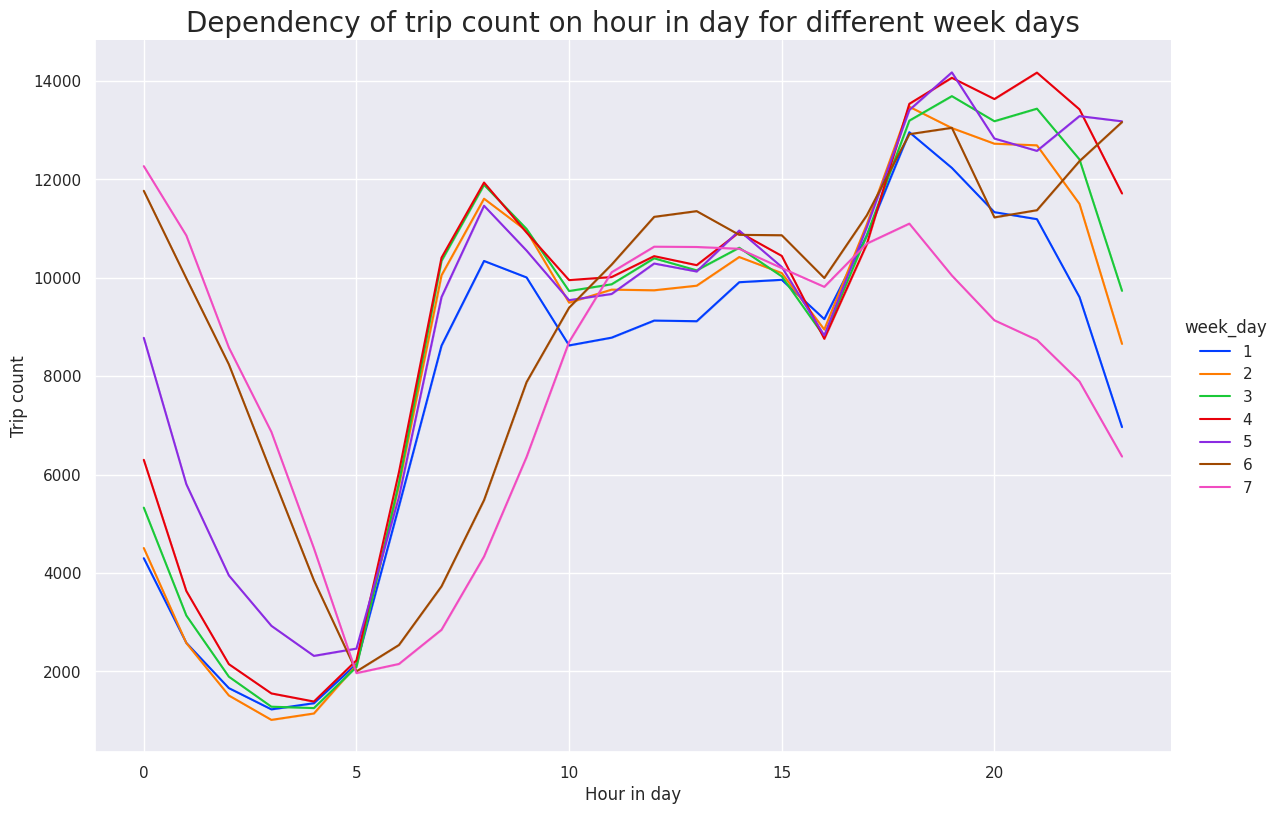

In [121]:
df['count_by_week_day_hour'] = df.groupby(['hour', 'week_day'])['week_day'].transform('count')

sns.relplot(x='hour', y='count_by_week_day_hour', hue='week_day', data=df, kind='line', palette='bright', height=8, aspect=1.5)

plt.title('Dependency of trip count on hour in day for different week days', fontsize=20)
plt.xlabel('Hour in day')
plt.ylabel('Trip count')

plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

Месяца, как мне кажется, не сильно выделяются. В январе и июне немного меньше поездок, чем в остальные месяцы, возможно, из-за произошедших аномалий.

В среднем пик поездок приходится на 18-19 часов — люди возвращаются домой и/или едут на какие-то вечерние мероприятия. Зачем количество поездок постепенно снижается (всё больше людей уже сладко спит в кроватке) и достигает минимума в 5 часов утра, а затем начинает резко расти (люди постепенно начинают просыпаться и ехать на работу), стабилизируется примерно в 7-8 часов утра и остаётся таким до небольшого спада в 15-16 часов (все уже пришли на работу, но ещё никто не ушёл?) и затем роста до пика, замыкая цикл.

Что касается дней недели, то в выходные и пятницу заметно больше ночных поездок (возвращаемся из баров, ну или более культурных мероприятий), зато в выходные также заметно меньше поездок с 5 до 10 утра (ураааааа, не надо на завод). Меньше всего поездок почти по всем часам в понедельник, не знаю почему. А по вечерам (с 18 до 0) меньше всего в воскресенье, тоже не поняла почему.


**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [ ]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2959 sha256=51bf966e2d22034a63010561b354cce8df35e47e6041da0fc0991f51c235095e
  Stored in directory: /root/.cache/pip/wheels/5b/f6/92/0173054cc528db7ffe7b0c7652a96c3102aab156a6da960387
Successfully built sklearn


In [122]:
from sklearn.model_selection import train_test_split

df.drop('count_by_week_day', axis=1, inplace=True)
df.drop('count_by_hour', axis=1, inplace=True)
df.drop('count_by_week_day_hour', axis=1, inplace=True)
df.drop('count_by_month_hour', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'log_trip_duration'], df['log_trip_duration'], test_size=0.3, random_state=228)

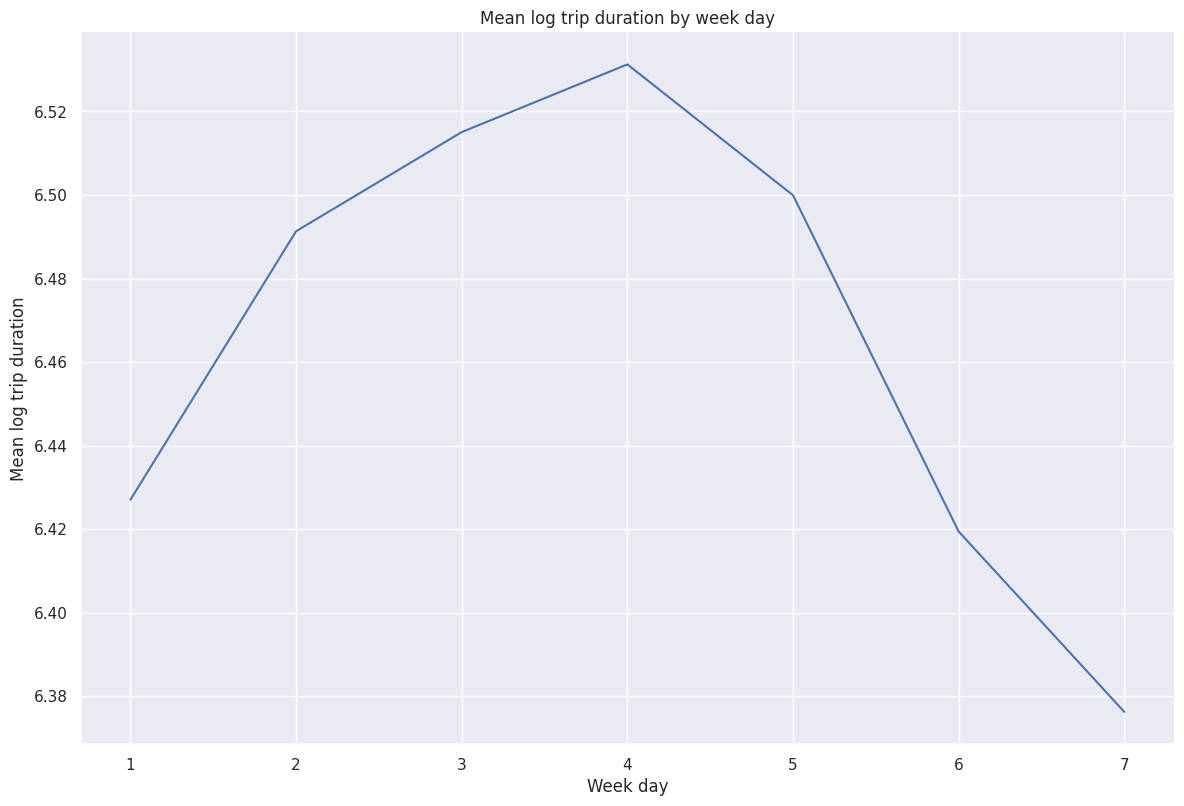

In [89]:
train_df = pd.concat([X_train, y_train], axis=1)

mean_by_week_day = train_df.groupby('week_day')['log_trip_duration'].mean().reset_index()

sns.relplot(x='week_day', y='log_trip_duration', data=mean_by_week_day, kind='line',  height=8, aspect=1.5)

plt.title('Mean log trip duration by week day')
plt.xlabel('Week day')
plt.ylabel('Mean log trip duration')

plt.show()

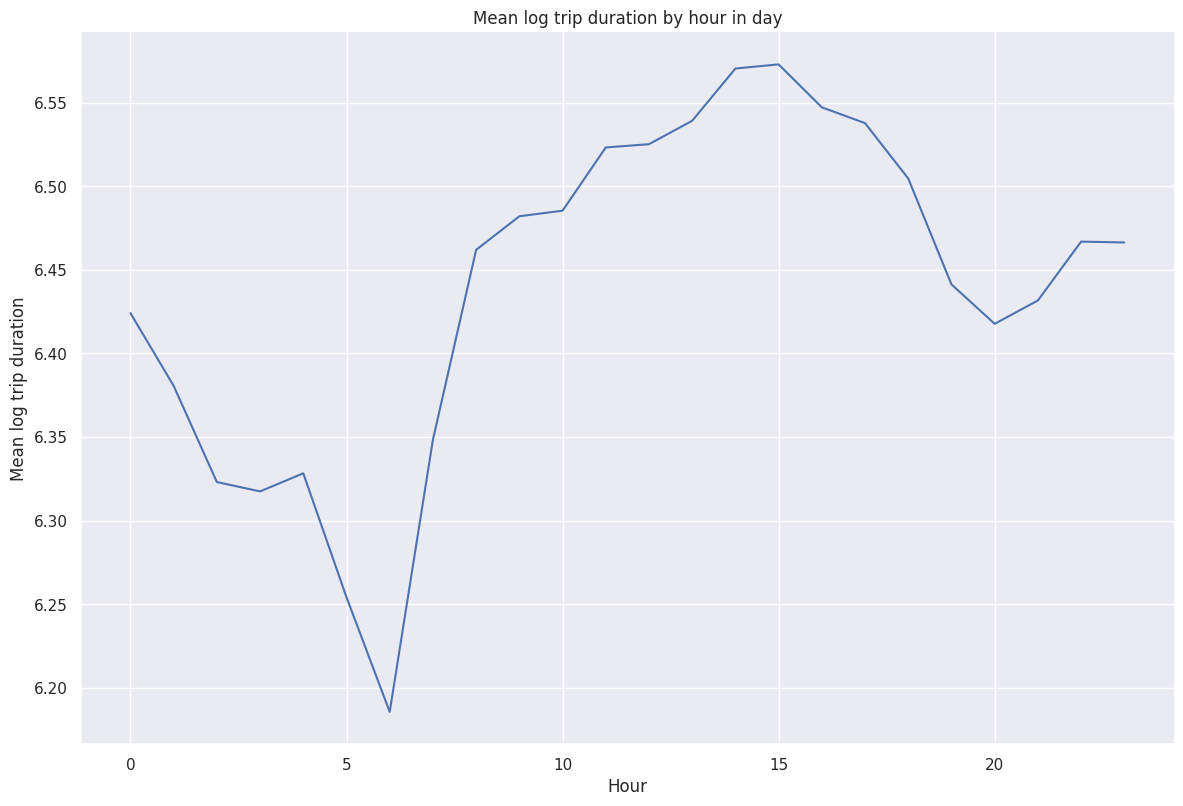

In [90]:
mean_by_hour = train_df.groupby('hour')['log_trip_duration'].mean().reset_index()

sns.relplot(x='hour', y='log_trip_duration', data=mean_by_hour, kind='line',  height=8, aspect=1.5)

plt.title('Mean log trip duration by hour in day')
plt.xlabel('Hour')
plt.ylabel('Mean log trip duration')

plt.show()

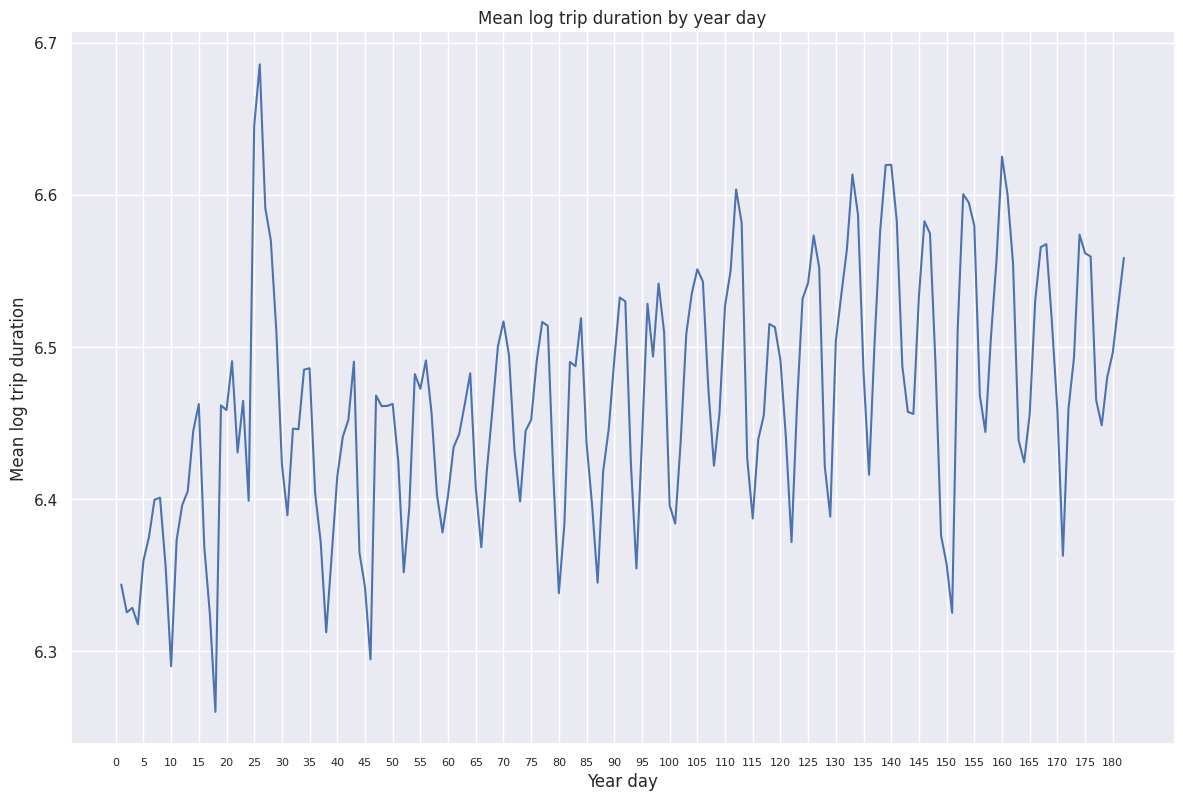

In [91]:
train_df['year_day'] = train_df['pickup_datetime'].dt.dayofyear

mean_by_year_day = train_df.groupby('year_day')['log_trip_duration'].mean().reset_index()

#сори, мне было слишком грустно опять долбаться с тем, как переделать номер дня в году в нормальный формат... для relplot это ещё сложнее
p = sns.relplot(x='year_day', y='log_trip_duration', data=mean_by_year_day, kind='line',  height=8, aspect=1.5)
p.set(xticks = np.arange(0, 182, 5))

plt.title('Mean log trip duration by year day')
plt.xlabel('Year day')
plt.ylabel('Mean log trip duration')
plt.tick_params (axis='x', which='major', labelsize= 8)

plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Графики зависимости таргета от дня недели и от часа в сутках, в приниципе, довольно похожи и это объяснимо: чем выше спрос, тем больше людей в это время куда-то едут (не обязательно на такси, скорее всего на личных автомобилях картина по часам/дням недели будет похожая), тем больше пробок и дольше люди в них стоят.

Средний таргет в первый аномальный период вырос на фоне предыдущего месяца. Видимо, добираться в сильный снежный шторм быстро было просто нереально. А непосредственно после аномального периода, видимо, спрос повысился до нормального, но снега всё ещё было много, поэтому была куча пробок и среднее время поездки было самое большое за полгода.

Во второй аномальный период таргет сильно упал на фоне остальных дней. Меньше поездое => меньше пробок => короче поездки, а погодные условия здесь, видимо, были не настолько фатальными.

На графике таргет постоянно скачет, это связано с днями недели. А по мере роста номера дня становится в среднем немного выше. Сложно сказать, c чем это связано, может, погода становится лучше и больше туристов приезжает в Нью-Йорк, хз...

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [123]:
#Первые три уже добавлены
df['year_day'] = df['pickup_datetime'].dt.dayofyear
df['first_anomaly'] = (df['year_day'].isin([23, 24, 25]))
df['second_anomaly'] = (df['year_day'] == 151)

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'log_trip_duration'], df['log_trip_duration'], test_size=0.3, random_state=228)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Все добавленные признаки, кроме 'year_day' стоит рассматривать как категориальные: с бинарными совсем очевидно, а со всеми остальными мы убедились, что зависимость таргета от них нелинейная, поэтому как-то не очень умно рассматривать их как численные. Для дня года всё же наблюдается некоторый тренд что  ростом его номера растёт величина таргета + различных значений многовато, чтобы делать категориальным.

Ещё как категориальные стоит рассматривать признаки 'store_and_fwd_flag' и 'vendor_id', потому что у них 2 значения и они, по сути, бинарные. Не знаю, правда, поможет ли их использование.

По поводу количества пассажиров сложно сказать, какой будет вид зависимости, но различных значений не очень много, поэтому давайте считать категориальным.

С широтой/долготой зависимости мы ещё не изучали сказать пока что-то сложно, численным его считать как-то странно, потому что очевидно, что зависимость от точки посадки/высадки ну вообще не будет линейной ни разу. Потом мы видимо с ней поработаем и как-то преобразуем подобно тому как преобразовали pickup_datetime в набор признаков. Но пока вопрос, числовой это признак или категориальный, кажется, не имеет смыcла. Так же как и признак pickup_datetime - сам по себе мы его не используем, поэтому и ответа на вопрос нет.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

categorical = ['week_day', 'hour', 'month', 'first_anomaly', 'second_anomaly']
numeric = ['year_day']

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical),
    ('scaling', StandardScaler(), numeric)
], remainder='drop')

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regression', Ridge())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Test RMSLE =", rmsle(y_test, y_pred))

Test RMSLE = 0.7891741717395762


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [124]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [22]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [23]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Достаточно большие скопления (особенно на pickup) в районе двух аэропортов (John Kennedy International и LaGuardia). Выбрала потому что это достаточно крупные скопления точек, выделяющиеся от основной массы) Странный вопрос какой-то.

Особенность этих скоплений в том, что в них длительность будет достаточно сильно отличаться в бОльшую сторону при условии равенства других параметров. Плюс в них день недели/время суток/день года менее очевидно влияют на количество поездок (я, например, сходу могу только сказать, что днём ходит общественный транспорт, поэтому, вероятно поездок будет меньше).


**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [128]:
#нагло пользуюсь кодом с семинара

def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h


df.loc[:, 'haversine'] = haversine_array(df['pickup_latitude'].values, df['pickup_longitude'].values, df['dropoff_latitude'].values, df['dropoff_longitude'].values)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [129]:
df['log_haversine'] = np.log1p(df['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [130]:
your_df = df
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

<Axes: title={'center': 'Distribution of trip mean speed'}, xlabel='mean_speed', ylabel='Count'>

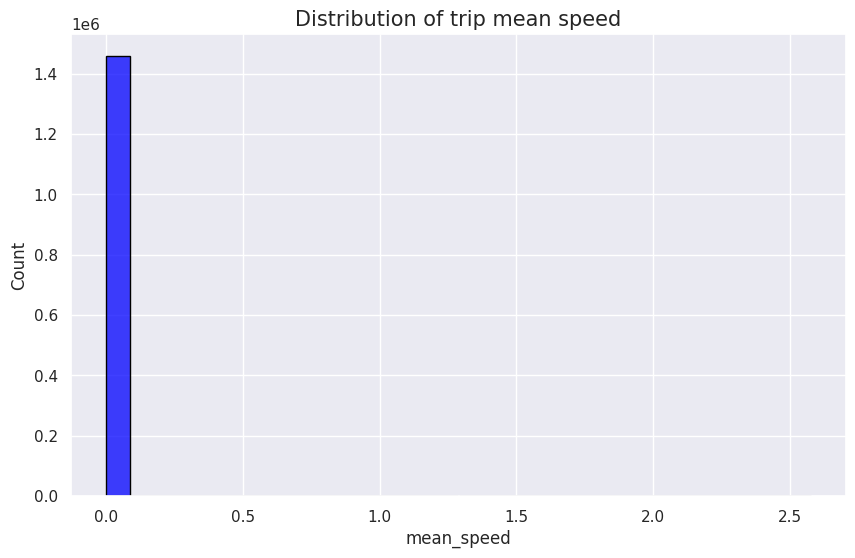

In [132]:
df['mean_speed'] = df['haversine'] / df['trip_duration']

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Distribution of trip mean speed', fontsize=15)
sns.histplot(df['mean_speed'], bins=30, ax=ax, color='blue', edgecolor='black')

Ясно текст.

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

Если честно, не очень понятно, зачем конкретно в этой задаче включать какие-то квантили,  если можно просто воспользоваться здравым смыслом. Расстояние у нас измеряется в километрах, время в секундах. 0.035 км/с = 126 км/ч. Вряд ли какой-то таксист будет так жёстко гнать, что средняя скорость поездки будет больше, так что этого нам должно хватить с запасом.

<Axes: title={'center': 'Distribution of trip mean speed'}, xlabel='mean_speed', ylabel='Count'>

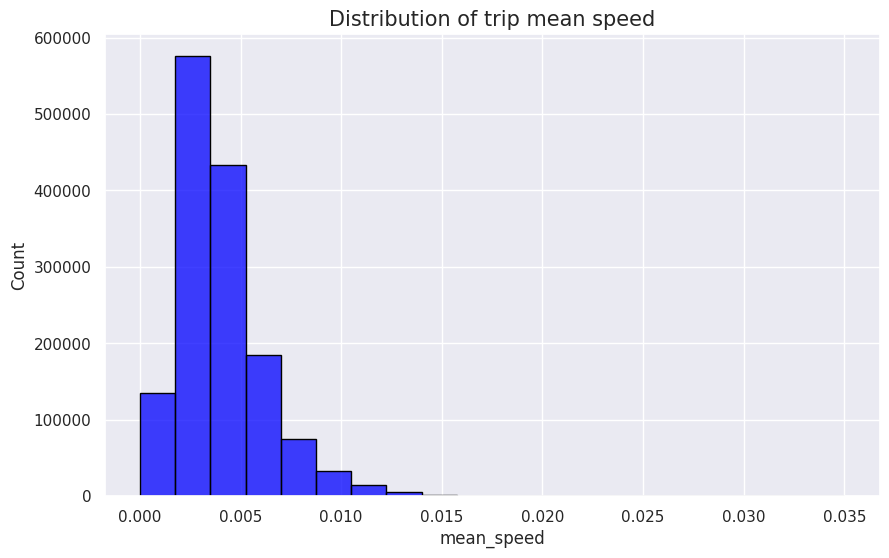

In [99]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Distribution of trip mean speed', fontsize=15)
sns.histplot(df['mean_speed'], bins=20, binrange=(0.0, 0.035), ax=ax, color='blue', edgecolor='black')

Давайте ещё нарисуем гистограмму со скоростями поменьше, до 0.015 км/с (54 км/ч).

<Axes: title={'center': 'Distribution of trip mean speed'}, xlabel='mean_speed', ylabel='Count'>

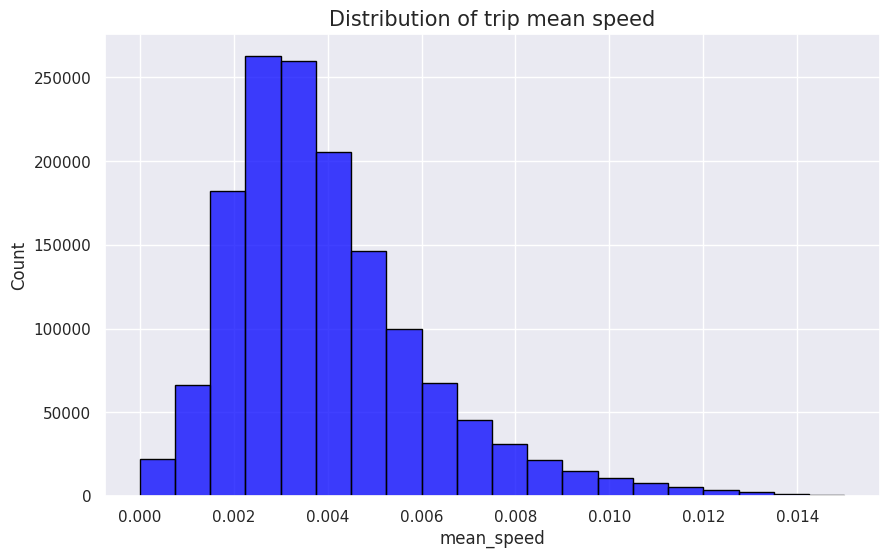

In [100]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Distribution of trip mean speed', fontsize=15)
sns.histplot(df['mean_speed'], bins=20, binrange=(0.0, 0.015), ax=ax, color='blue', edgecolor='black')

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

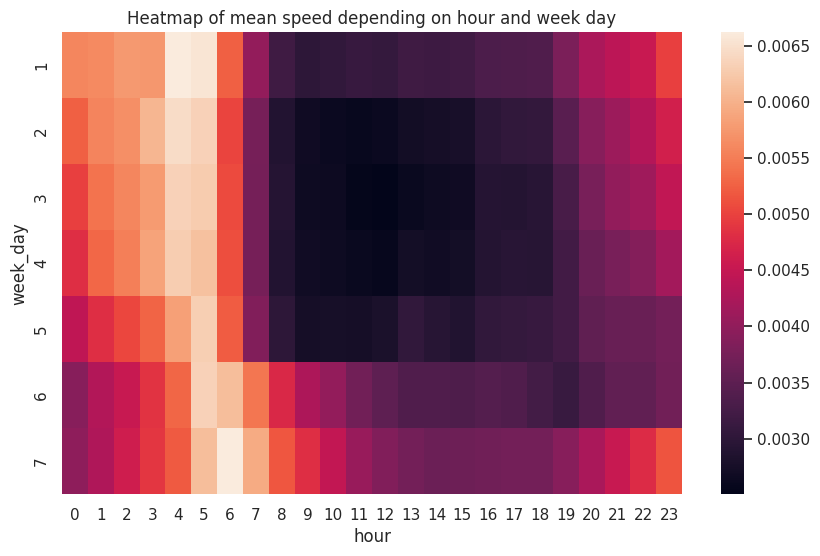

In [101]:
median_speed = df.groupby(['week_day', 'hour']).median('mean_speed').reset_index()
median_speed_matrix = pd.pivot_table(data=median_speed, index='week_day', columns='hour', values='mean_speed')

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(median_speed_matrix, ax=ax);
ax.set_title('Heatmap of mean speed depending on hour and week day')

plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Скорость напрямую зависит от времени поездки, а это целевой таргет, который мы, вообще-то должны предсказывать, и которого у нас не будет в тестовых данных. По сути это можно считать утечкой данных о целевой переменной, на которых учить модель, конечно, нельзя.

In [133]:
df.drop('mean_speed', axis=1, inplace=True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Минимальная скорость в будни приблизительно с 8 до 18; максимальная в будни с 4 до 5 и в выходные с 5 до 6.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [134]:
df['is_free_roads'] = (((df['hour'] >= 4) & (df['hour'] <= 5) & (df['week_day'] <= 5)) | ((df['hour'] >= 5) & (df['hour'] <= 6) & (df['week_day'] >= 6)))
df['is_traffic_jams'] = ((df['hour'] >= 8) & (df['hour'] <= 18) & (df['week_day'] <= 5))

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

Полезны они могут быть по тем же причинам, по которым особенны выделенные нами скопления точек: при pickup/dropoff в них длительность поездки может значительно отличаться от других мест при условии равенства остальных параметров + в них день недели/время суток/день года менее очевидно влияют на количество поездок.

In [135]:
#координаты примерно брала ручками в гугл-картах

first_pickup_longitude = ((df['pickup_longitude'] >= -73.791850) & (df['pickup_longitude'] <= -73.775993))
first_pickup_latitude = ((df['pickup_latitude'] >= 40.642420) & (df['pickup_latitude'] <= 40.649044))
df['pickup_first_airport'] = (first_pickup_longitude & first_pickup_latitude)

first_dropoff_longitude = ((df['dropoff_longitude'] >= -73.791850) & (df['dropoff_longitude'] <= -73.775993))
first_dropoff_latitude = ((df['dropoff_latitude'] >= 40.642420) & (df['dropoff_latitude'] <= 40.649044))
df['dropoff_first_airport'] = (first_dropoff_longitude & first_dropoff_latitude)

second_pickup_longitude = ((df['pickup_longitude'] >= -73.889466) & (df['pickup_longitude'] <= -73.858100))
second_pickup_latitude = ((df['pickup_latitude'] >= 40.767582) & (df['pickup_latitude'] <= 40.779669))
df['pickup_second_airport'] = (second_pickup_longitude & second_pickup_latitude)

second_dropoff_longitude = ((df['dropoff_longitude'] >= -73.889466) & (df['dropoff_longitude'] <= -73.858100))
second_dropoff_latitude = ((df['dropoff_latitude'] >= 40.767582) & (df['dropoff_latitude'] <= 40.779669))
df['dropoff_second_airport'] = (second_dropoff_longitude & second_dropoff_latitude)

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

<Axes: xlabel='dropoff_second_airport', ylabel='log_trip_duration'>

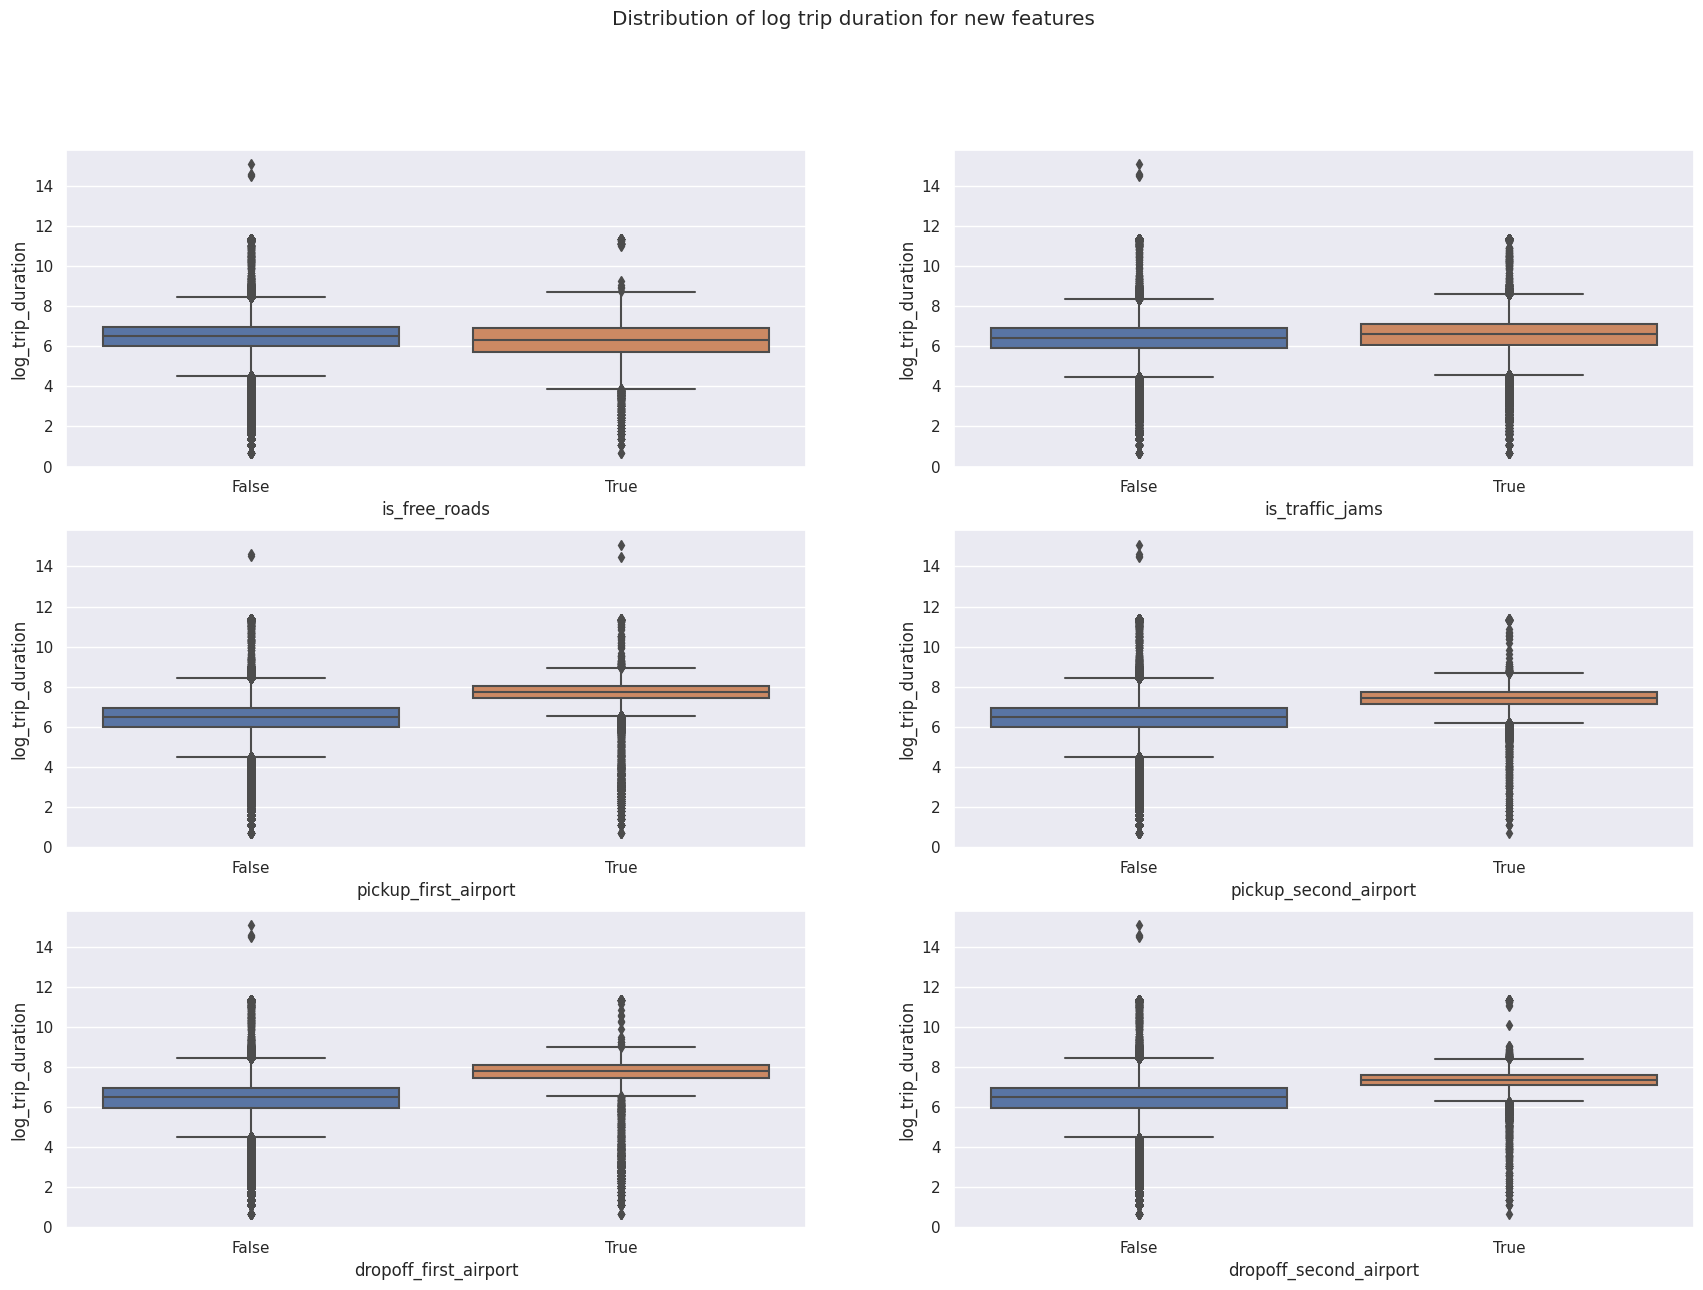

In [105]:
fig, axes = plt.subplots(3, 2, figsize=(21, 14))
fig.suptitle("Distribution of log trip duration for new features")

sns.boxplot(data=df, x='is_free_roads', y='log_trip_duration', ax=axes[0, 0])
sns.boxplot(data=df, x='is_traffic_jams', y='log_trip_duration', ax=axes[0, 1])
sns.boxplot(data=df, x='pickup_first_airport', y='log_trip_duration', ax=axes[1, 0])
sns.boxplot(data=df, x='pickup_second_airport', y='log_trip_duration', ax=axes[1, 1])
sns.boxplot(data=df, x='dropoff_first_airport', y='log_trip_duration', ax=axes[2, 0])
sns.boxplot(data=df, x='dropoff_second_airport', y='log_trip_duration', ax=axes[2, 1])

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Признаки, связанные с pickup и dropoff, кажется, получилсь хорошие: в них довольно сильно различается продолжительность поездки при True и False. Признаки, связанные cо свободными дорогами/пробками оказались менее информативными (распределения более похожи), но всё равно немного разными, так что, возможно, эти признаки тоже имеет смысл использовать.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [136]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    #здесь тоже ручками взяла с гугл-карт координаты
    def __init__(self, longitude_cells, latitude_cells):
        self.longitude_cells = longitude_cells
        self.latitude_cells = latitude_cells

        self.min_longitude = -74.017540
        self.min_latitude = 40.709002
        self.max_longitude = -73.937312
        self.max_latitude = 40.797593

        self.longitude_cell_size = (self.max_longitude - self.min_longitude) / self.longitude_cells
        self.latitude_cell_size = (self.max_latitude - self.min_latitude) / self.latitude_cells

    def show_map(self):
        # you may want to visualize cells
        pass

    def fit(self, X=None, y=None):
        # your code here
        return self

    def transform(self, X, y=None):
        Xc = X.copy()

        Xc["pickup_cell"] = -1
        Xc["dropoff_cell"] = -1

        for longitude_cell_num in range(self.longitude_cells):
            min_longitude = self.min_longitude + longitude_cell_num * self.longitude_cell_size
            max_longitude = self.min_longitude + (longitude_cell_num + 1) * self.longitude_cell_size

            for latitude_cell_num in range(self.latitude_cells):
                min_latitude = self.min_latitude + latitude_cell_num * self.latitude_cell_size
                max_latitude = self.min_latitude + (latitude_cell_num + 1) * self.latitude_cell_size

                cell_num = latitude_cell_num * self.longitude_cells + longitude_cell_num

                Xc.loc[((Xc['pickup_latitude'] >= min_latitude) & (Xc['pickup_latitude'] <= max_latitude) & \
                 (Xc['pickup_longitude'] >= min_longitude) & (Xc['pickup_longitude'] <= max_longitude)), "pickup_cell"] = cell_num
                Xc.loc[((Xc['dropoff_latitude'] >= min_latitude) & (Xc['dropoff_latitude'] <= max_latitude) & \
                 (Xc['dropoff_longitude'] >= min_longitude) & (Xc['dropoff_longitude'] <= max_longitude)), "dropoff_cell"] = cell_num

        return Xc

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [137]:
categorical = ['week_day', 'hour', 'month', 'first_anomaly', 'second_anomaly',
               'is_traffic_jams', 'is_free_roads', 'pickup_first_airport', 'dropoff_first_airport', 'pickup_second_airport', 'dropoff_second_airport']
numeric = ['year_day', 'log_haversine']

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical),
    ('scaling', StandardScaler(), numeric)
], remainder='drop')

pipeline = Pipeline([("map_transformer", MapGridTransformer(3, 4)),
                    ("preprocessing", preprocessor),
                    ("regression", Ridge())])

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'log_trip_duration'], df['log_trip_duration'], test_size=0.3, random_state=228)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Test RMSLE =", rmsle(y_test, y_pred))

Test RMSLE = 0.4898795225435487


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Потенциально `vendor_id` может быть полезным, поскольку, например, люди в разных районах (соответственно, с разной дорожной ситуацией и временем поездки) могут предпочитать разных провайдеров. Или у какого-то из провайдеров могут быть в среднем более опытные водители, которые умеют объезжать пробки.

Потенциально `passenger_count` может быть полезным, поскольку, например, чем больше пассажиров, тем больше вероятность нескольких точек высадки (хотя я не знаю, работает ли это в Нью-Йоркском такси... Но звучит вполне разумно).

Потенциально `store_and_fwd_flag` тяжело придумать, почему может быть полезным... Может, если он равен 'Y' и данные о поездке сохранялись локально, то видимо, у водителя пропадал интернет (=> проблемы с навигацией) или могли быть ещё какие-то проблемы.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [67]:
print("Number of unique vendor_id values:", df['vendor_id'].nunique())
print("Number of unique passenger_count values:", df['passenger_count'].nunique())
print("Number of unique store_and_fwd_flag values:", df['vendor_id'].nunique())

Number of unique vendor_id values: 2
Number of unique passenger_count values: 10
Number of unique store_and_fwd_flag values: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

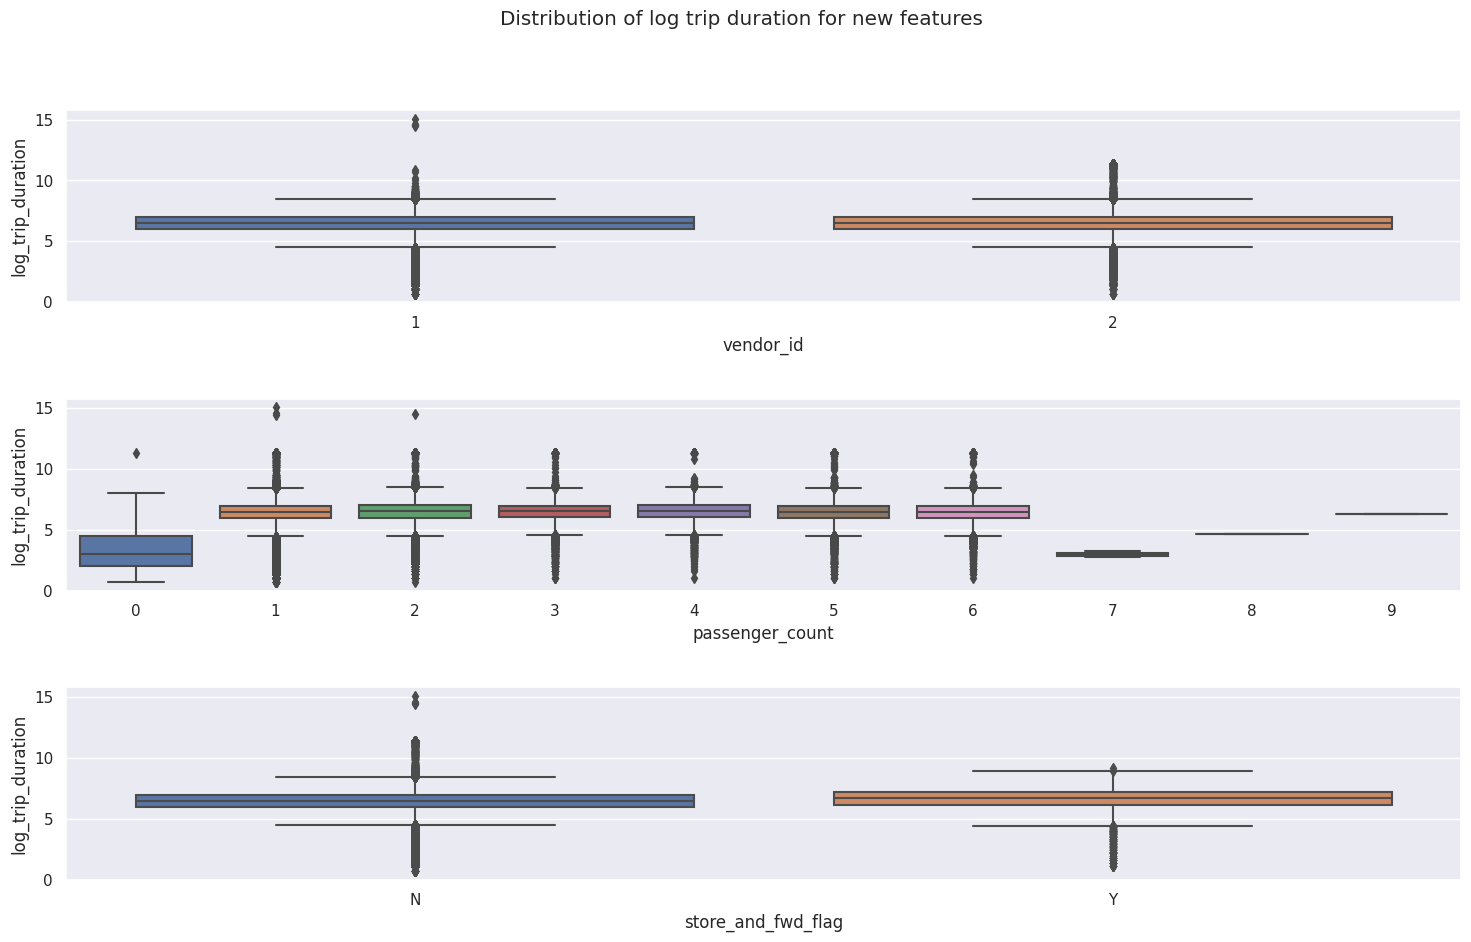

In [75]:
fig, axes = plt.subplots(3, 1, figsize=(18, 10))
fig.suptitle("Distribution of log trip duration for new features")

sns.boxplot(data=df, x='vendor_id', y='log_trip_duration', ax=axes[0])
sns.boxplot(data=df, x='passenger_count', y='log_trip_duration', ax=axes[1])
sns.boxplot(data=df, x='store_and_fwd_flag', y='log_trip_duration', ax=axes[2])

# Preventing overlap of x-axis labels
plt.subplots_adjust(hspace=0.5)

plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [138]:
df['vendor_id'] = df['vendor_id'].map({1: 0, 2: 1})
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

В принципе, судя по графикам, распределения выглядят примерно одинаково при разных параметрах. Едва заметно длительность поездки больше при `store_and_fwd_flag == 'Y'`. Ну и ещё заметно меньше при 0 пассажирах (от 1 до 6 распределения времён примерно одинаковые, при 7-9 просто очень мало поездок).

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [139]:
categorical = ['week_day', 'hour', 'month', 'first_anomaly', 'second_anomaly',
               'is_traffic_jams', 'is_free_roads', 'pickup_first_airport', 'dropoff_first_airport', 'pickup_second_airport', 'dropoff_second_airport',
               'vendor_id', 'store_and_fwd_flag']
numeric = ['year_day', 'log_haversine', 'passenger_count']

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical),
    ('scaling', StandardScaler(), numeric)
], remainder='drop')

pipeline = Pipeline([("map_transformer", MapGridTransformer(3, 4)),
                    ("preprocessing", preprocessor),
                    ("regression", Ridge())])

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'log_trip_duration'], df['log_trip_duration'], test_size=0.3, random_state=228)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Test RMSLE =", rmsle(y_test, y_pred))

Test RMSLE = 0.48964754269414984


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

На 0.0002 улучшилось качество, ну наверное как-то не очень круто.

In [140]:
df.drop('vendor_id', axis=1, inplace=True)
df.drop('store_and_fwd_flag', axis=1, inplace=True)
df.drop('passenger_count', axis=1, inplace=True)

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

<Axes: title={'center': 'Distribution of log trip duration'}, xlabel='log_trip_duration', ylabel='Count'>

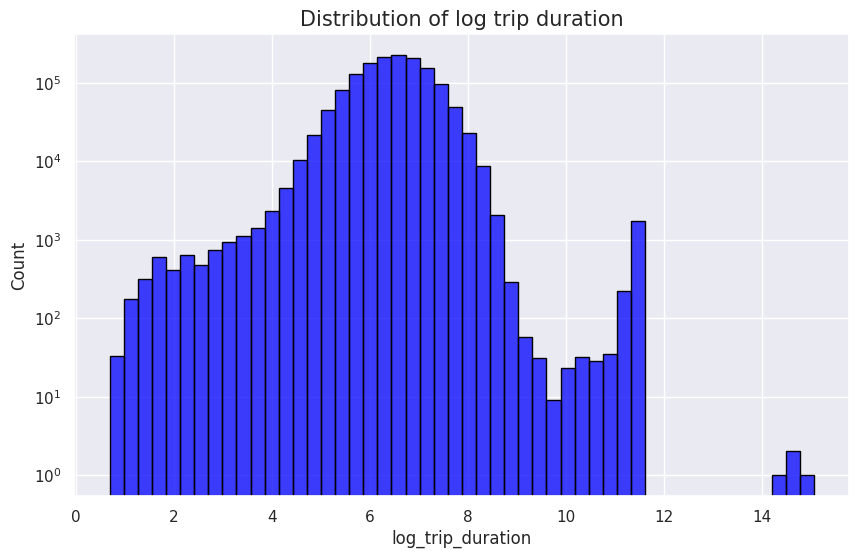

In [146]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Distribution of log trip duration', fontsize=15)
sns.histplot(df['log_trip_duration'], bins=50, ax=ax, color='blue', edgecolor='black', log_scale=(False, True))

Есть некоторое количество объектов с log_trip_duration < 3 (около 20 секунд), явно маловато для поездки на такси, давайте выкинем их из обучающей выборки. Также есть эпсилон поездок с log_trip_duration > 14, это больше 300 часов)) Предлагаю их тоже выкинуть.

In [147]:
train_df = pd.concat([X_train, y_train], axis=1)
train_df = train_df[train_df['log_trip_duration'] >= 3]
train_df = train_df[train_df['log_trip_duration'] < 14]

<Axes: title={'center': 'Distribution of log haversine'}, xlabel='log_haversine', ylabel='Count'>

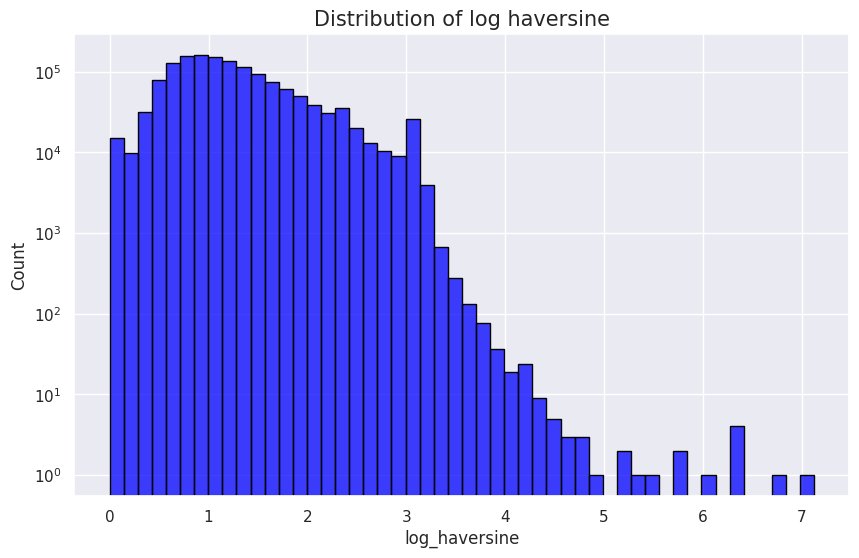

In [148]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Distribution of log haversine', fontsize=15)
sns.histplot(df['log_haversine'], bins=50, ax=ax, color='blue', edgecolor='black', log_scale=(False, True))

Есть некоторое количество объектов с log_haversine > 4.5, это больше 90 км. Давайте избавимся от них.

In [149]:
train_df = train_df[train_df['log_haversine'] <= 4.5]

<Axes: title={'center': 'Errors distribution'}, xlabel='Absolute error', ylabel='Count'>

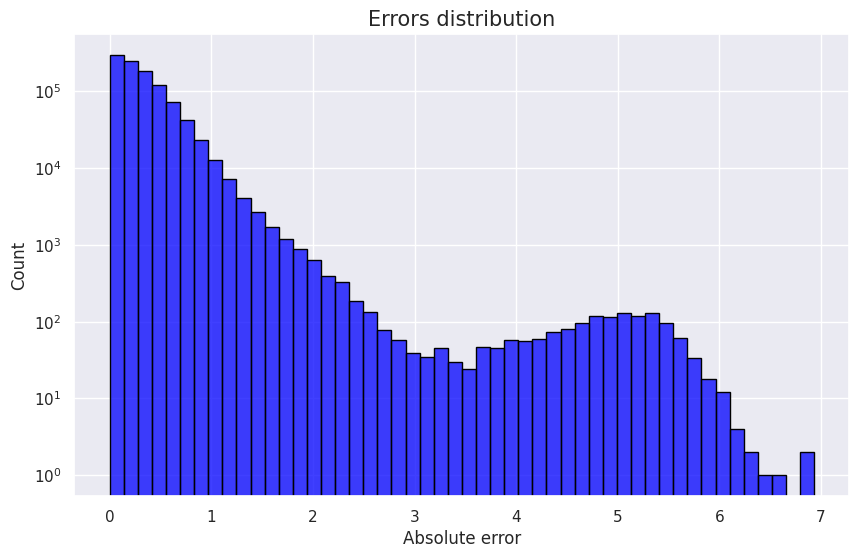

In [151]:
pipeline.fit(train_df, train_df["log_trip_duration"])
y_train = pipeline.predict(train_df)

errors = np.abs(y_train - train_df["log_trip_duration"])
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Errors distribution', fontsize=15)
ax.set_xlabel('Absolute error')
sns.histplot(errors, bins=50, ax=ax, color='blue', edgecolor='black', log_scale=(False, True))

На небольшом количестве объектов из обучающей выборки absolute error > 3, т.е. мы ошибаемся больше чем в 20 раз. Думаю, такие объекты тоже можно считать выбросами, давайте их тоже уберём.

In [152]:
good = errors <= 4
train_df = train_df[good]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [156]:
with_cells_features = MapGridTransformer(3, 4).transform(train_df)
for feature in categorical:
    print("there are {} rare values of {}".format((with_cells_features.groupby(feature).size() < 1000).sum(), feature))

there are 0 rare values of week_day
there are 0 rare values of hour
there are 0 rare values of month
there are 0 rare values of first_anomaly
there are 0 rare values of second_anomaly
there are 0 rare values of is_traffic_jams
there are 0 rare values of is_free_roads
there are 0 rare values of pickup_first_airport
there are 0 rare values of dropoff_first_airport
there are 0 rare values of pickup_second_airport
there are 0 rare values of dropoff_second_airport
there are 0 rare values of vendor_id
there are 0 rare values of store_and_fwd_flag


Ну как будто редких признаков и нет особо... Давайте всё как было оставим.

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [157]:
pipeline.fit(train_df, train_df["log_trip_duration"])
y_pred = pipeline.predict(X_test)

print("Test RMSLE =", rmsle(y_test, y_pred))

Test RMSLE = 0.4900795631447654


Качество стало немного хуже, поскольку наша моделька теперь не подстраивается под выбросы, которые, вероятнее всего, присутствуют в тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.